<a href="https://colab.research.google.com/github/Hiroto-4431/AI-DataScience/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = 10, 6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 39.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
df = pd.read_csv('/content/drive/MyDrive/AI-DataScience/hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


- Step1 : 集計・可視化（探索的データ分析）
- Step2 : 仮説立て
- Step3 : 仮説が正しいか検証（確証的データ分析）

## Step1 : 集計・可視化

<Axes: xlabel='満足度', ylabel='count'>

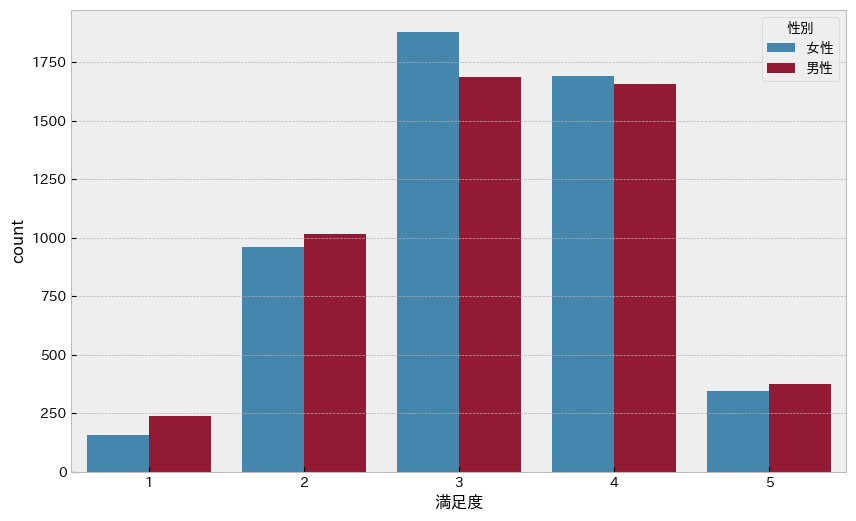

In [3]:
sns.countplot(x='満足度', hue='性別', data=df)

In [5]:
group = df.groupby('性別')
group['満足度'].agg(['mean', 'median'])

,mean,median
性別,,
女性,3.219638,3.0
男性,3.183940,3.0


## Step2 : 仮説立て
- 性別によって、満足度には差がある

## Step3 : 仮説が正しいか検証

In [7]:
group1 = group.get_group('男性')
group2 = group.get_group('女性')

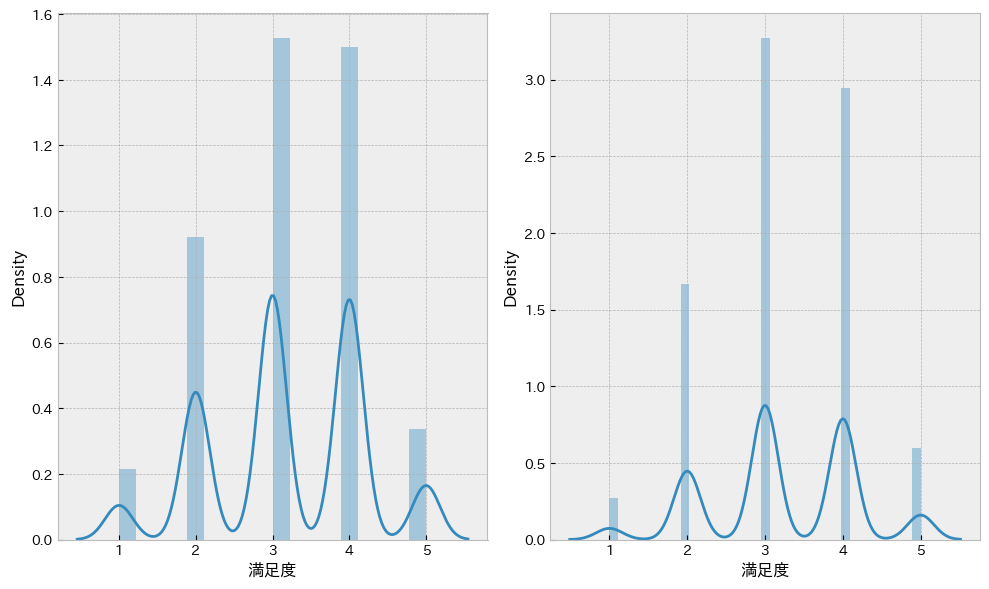

In [8]:
# 可視化
plt.subplot(1, 2, 1)
sns.distplot(group1['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(group2['満足度'])
plt.tight_layout()

In [9]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group1['満足度'], 'norm') # 正規分布ではない

KstestResult(statistic=0.9297554023645598, pvalue=0.0, statistic_location=2, statistic_sign=-1)

In [10]:
stats.kstest(group2['満足度'], 'norm') # 正規分布ではない

KstestResult(statistic=0.9460433484732081, pvalue=0.0, statistic_location=2, statistic_sign=-1)

- 仮説立て
  - 帰無仮説 : 2群間の平均値に差がない
  - 対立仮説 : 2群間の平均値に差がある
- 有意水準
  - 5%
- p値
  - 0.00055 < 0.05
- 判定
  - 帰無仮説を棄却する
  - 2群間の平均値に差がある

In [12]:
stats.mannwhitneyu(group1['満足度'], group2['満足度'], alternative='two-sided')

MannwhitneyuResult(statistic=12311050.0, pvalue=0.1708277786931579)

## Step1 : 集計・可視化

<Axes: xlabel='満足度', ylabel='count'>

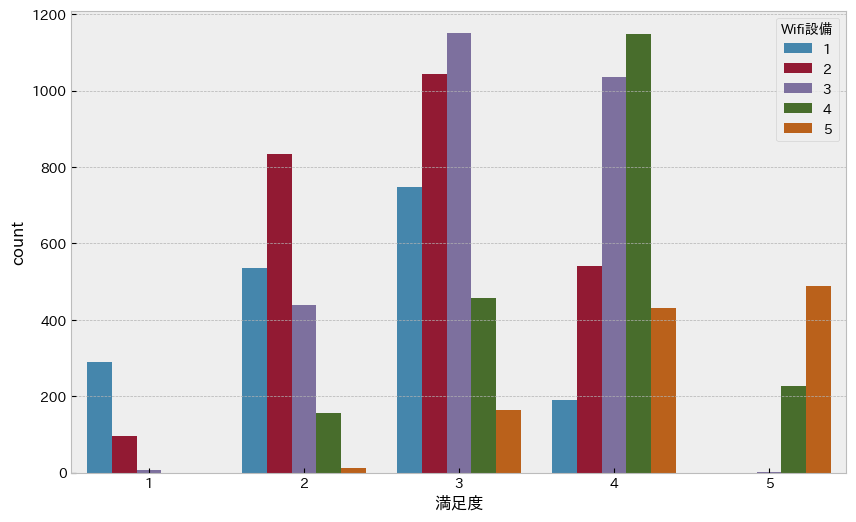

In [13]:
sns.countplot(x='満足度', hue='Wifi設備', data=df)

In [14]:
group = df.groupby('Wifi設備')
group['満足度'].agg(['mean', 'median'])

,mean,median
Wifi設備,,
1,2.476461,3.0
2,2.807234,3.0
3,3.221168,3.0
4,3.727364,4.0
5,4.274385,4.0


## Step2 : 仮説立て
- Wifi設備と満足度は独立ではなく、何らかにつの関連性を持っている

## Step3 : 仮説が正しいか検証
- χ二乗検定
  - 帰無仮説 : 2群間は独立
  - 対立仮説 : 2群間は独立ではない（何らかの関連性を持っている）

In [15]:
crosstab = pd.crosstab(df['満足度'], df['Wifi設備'])
crosstab

Wifi設備,1,2,3,4,5
満足度,,,,,
1,289,96,8,0,0
2,535,835,439,155,12
3,749,1043,1152,458,164
4,190,542,1036,1149,432
5,0,0,1,226,489


In [16]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
p

0.0

## Step1 : 集計・可視化

In [17]:
group = df.groupby('Wifi設備')
group['満足度'].agg(['mean', 'median'])

,mean,median
Wifi設備,,
1,2.476461,3.0
2,2.807234,3.0
3,3.221168,3.0
4,3.727364,4.0
5,4.274385,4.0


In [19]:
satis_0 = df.query('Wifi設備<=3')
satis_1 = df.query('Wifi設備>=4')

In [21]:
satis_0['満足度'].mean()

2.880694143167028

In [23]:
satis_1['満足度'].mean()

3.9218800648298218

## Step2 : 仮説立て
- Wifi設備の評価が4以上の人と、3以下の人では満足度の平均値に差がある

## Step3 : 仮説が正しいか検証

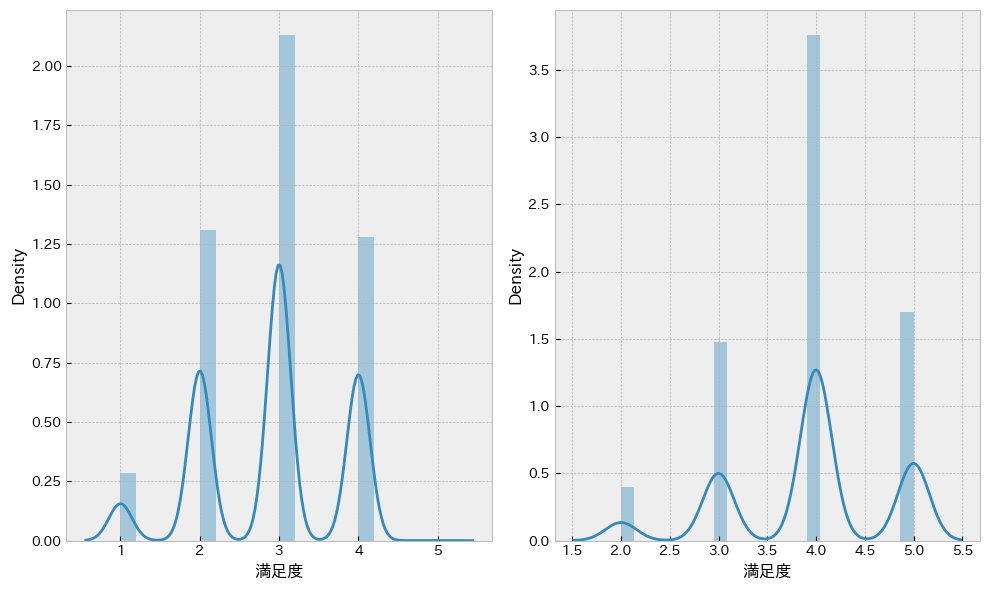

In [24]:
# 可視化
plt.subplot(1, 2, 1)
sns.distplot(satis_0['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(satis_1['満足度'])
plt.tight_layout()

In [27]:
stats.kstest(satis_0['満足度'], 'norm') # 正規分布ではない

KstestResult(statistic=0.920416896251387, pvalue=0.0, statistic_location=2, statistic_sign=-1)

In [28]:
stats.kstest(satis_1['満足度'], 'norm') # 正規分布ではない

KstestResult(statistic=0.9772498680518208, pvalue=0.0, statistic_location=2, statistic_sign=-1)

- 仮説立て
  - 帰無仮説 : 2群間の平均値に差がない
  - 対立仮説 : 2群間の平均値に差がある
- 有意水準
  - 5%
- p値
  - 0.00055 < 0.05
- 判定
  - 帰無仮説を棄却する
  - 2群間の平均値に差がある

In [29]:
stats.mannwhitneyu(satis_0['満足度'], satis_1['満足度'], alternative='two-sided')

MannwhitneyuResult(statistic=4353567.0, pvalue=0.0)